In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
#initial population
population = 100
genes = 100
generations = 100

pop = np.random.randint(0,2, size=(population,genes))
print(pop)

[[0 1 0 ... 1 0 0]
 [1 0 1 ... 0 1 0]
 [0 1 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [0 1 0 ... 1 1 0]
 [1 1 0 ... 1 0 1]]


(array([ 4.,  7.,  9., 13., 16., 29.,  9.,  5.,  4.,  4.]),
 array([40. , 42.2, 44.4, 46.6, 48.8, 51. , 53.2, 55.4, 57.6, 59.8, 62. ]),
 <BarContainer object of 10 artists>)

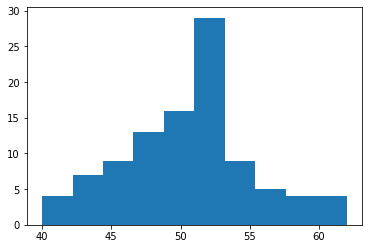

In [4]:
fitness = np.sum(pop,axis=1)
plt.hist(fitness)

In [5]:
def elite_selection(fitness):
  return fitness.argsort()[-2:][::-1]

parents = elite_selection(fitness)
print(pop[parents[0]])

[1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1
 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1
 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1]


In [6]:
def crossover(parent1, parent2, crossover_rate):
  # children are copies of parents by default
  child1, child2 = parent1.copy(), parent2.copy()
  # check for recombination
  if random.random() < crossover_rate:
    # select crossover point that is not on the end of the string
    pt = random.randint(1, len(parent1)-2)
    # perform crossover
    child1 = np.concatenate((parent1[:pt], parent2[pt:]))
    child2 = np.concatenate((parent2[:pt], parent1[pt:]))
  return [child1, child2]

crossover(pop[parents[0]],pop[parents[1]], .5)

[array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0]),
 array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])]

In [7]:
def mutation(individual, mutation_rate):
  for i in range(len(individual)):
	  # check for a mutation
    if random.random() < mutation_rate:
      # flip the bit
      individual[i] = 1 - individual[i]
  return individual

mutation(pop[parents[0]], .5)

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1])

In [14]:
def simple_GA(pop, crossover_rate=.8, mutation_rate=.05):
  fitness = np.sum(pop,axis=1)
  parents = elite_selection(fitness)
  children = np.zeros((population,genes))
  for i in range(population):
    offspring = crossover(pop[parents[0]],pop[parents[1]], crossover_rate)
    children[i] = mutation(offspring[0],mutation_rate)
  return children

simple_GA(pop)

array([[1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.]])

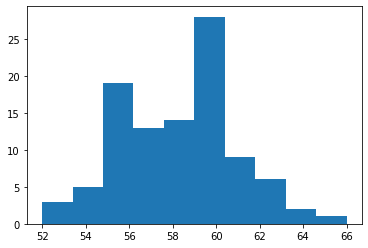

Generation 1
    Max fitness 66.0
    Min fitness 52.0
    Mean fitness 58.19
    Std fitness 2.5949759151098113


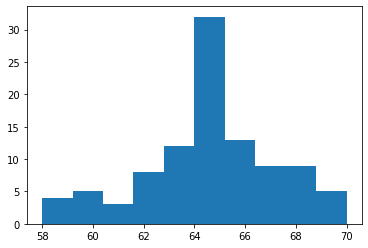

Generation 2
    Max fitness 70.0
    Min fitness 58.0
    Mean fitness 64.51
    Std fitness 2.6210494081569697


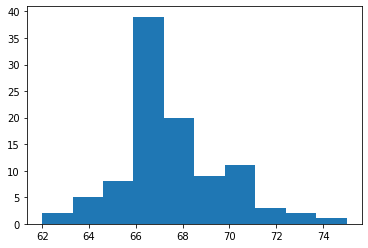

Generation 3
    Max fitness 75.0
    Min fitness 62.0
    Mean fitness 67.52
    Std fitness 2.242676971835222


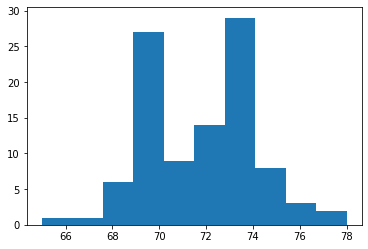

Generation 4
    Max fitness 78.0
    Min fitness 65.0
    Mean fitness 71.82
    Std fitness 2.426437718137435


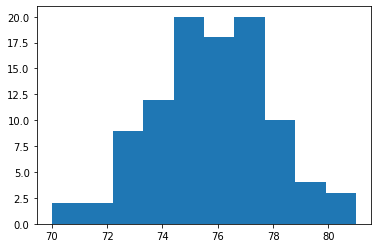

Generation 5
    Max fitness 81.0
    Min fitness 70.0
    Mean fitness 75.75
    Std fitness 1.9716744153130354


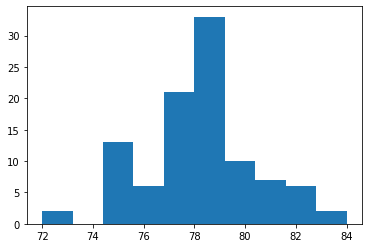

Generation 6
    Max fitness 84.0
    Min fitness 72.0
    Mean fitness 78.1
    Std fitness 2.2338307903688674


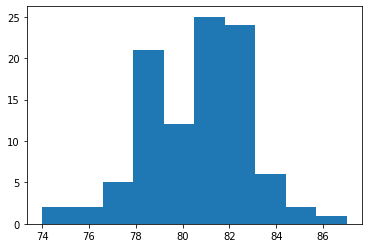

Generation 7
    Max fitness 87.0
    Min fitness 74.0
    Mean fitness 80.63
    Std fitness 2.3136767276350425


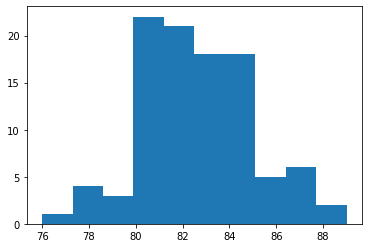

Generation 8
    Max fitness 89.0
    Min fitness 76.0
    Mean fitness 82.61
    Std fitness 2.412032338091677


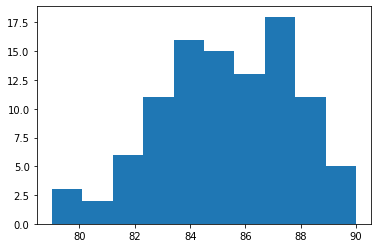

Generation 9
    Max fitness 90.0
    Min fitness 79.0
    Mean fitness 85.22
    Std fitness 2.260884782557484


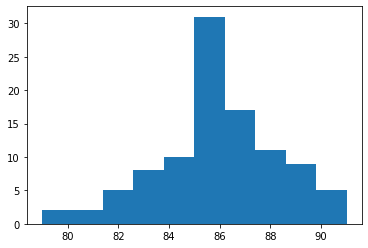

Generation 10
    Max fitness 91.0
    Min fitness 79.0
    Mean fitness 85.87
    Std fitness 2.3860217936976182


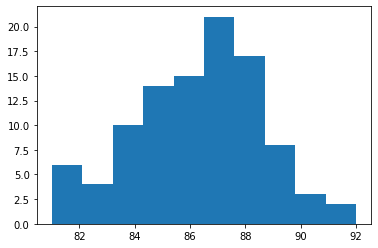

Generation 11
    Max fitness 92.0
    Min fitness 81.0
    Mean fitness 86.28
    Std fitness 2.200363606316011


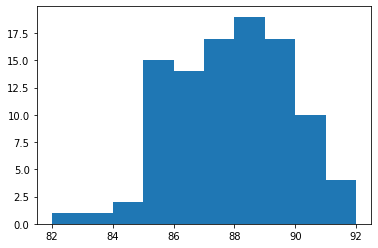

Generation 12
    Max fitness 92.0
    Min fitness 82.0
    Mean fitness 87.41
    Std fitness 1.9136091554964925


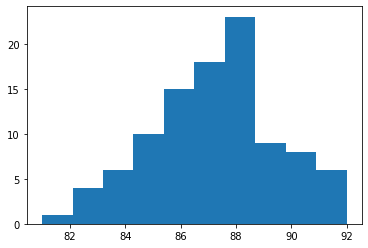

Generation 13
    Max fitness 92.0
    Min fitness 81.0
    Mean fitness 87.15
    Std fitness 2.104162541250081


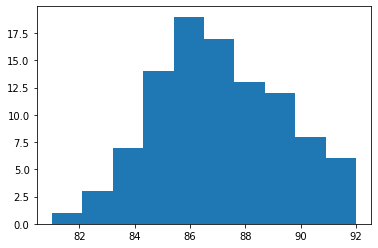

Generation 14
    Max fitness 92.0
    Min fitness 81.0
    Mean fitness 87.01
    Std fitness 2.1656176947928736


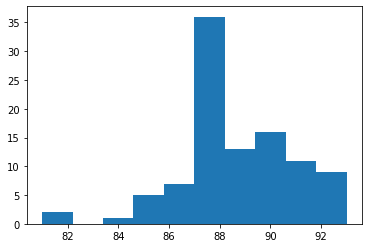

Generation 15
    Max fitness 93.0
    Min fitness 81.0
    Mean fitness 88.58
    Std fitness 2.2635370551417973


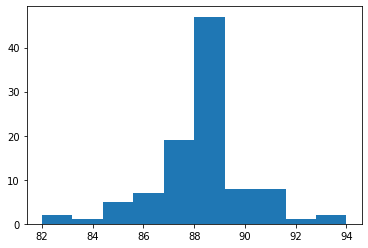

Generation 16
    Max fitness 94.0
    Min fitness 82.0
    Mean fitness 88.11
    Std fitness 1.9177851808792348


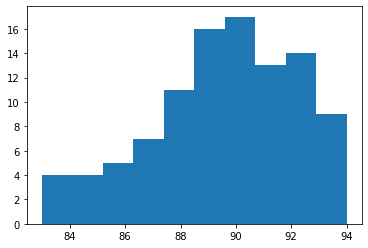

Generation 17
    Max fitness 94.0
    Min fitness 83.0
    Mean fitness 89.47
    Std fitness 2.4958164996649894


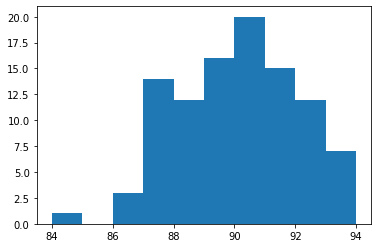

Generation 18
    Max fitness 94.0
    Min fitness 84.0
    Mean fitness 89.63
    Std fitness 2.018192260415246


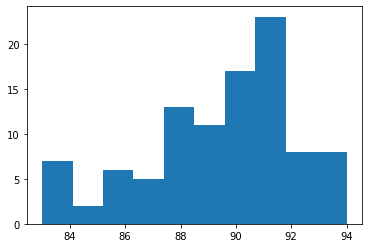

Generation 19
    Max fitness 94.0
    Min fitness 83.0
    Mean fitness 89.35
    Std fitness 2.471335671251479


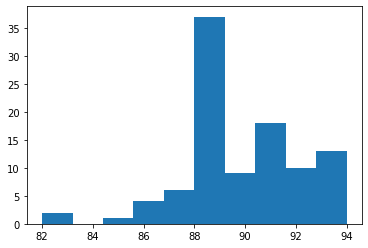

Generation 20
    Max fitness 94.0
    Min fitness 82.0
    Mean fitness 89.78
    Std fitness 2.317671245021606


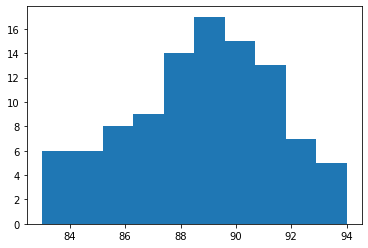

Generation 21
    Max fitness 94.0
    Min fitness 83.0
    Mean fitness 88.7
    Std fitness 2.4718414188616546


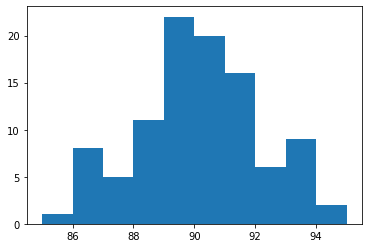

Generation 22
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 89.68
    Std fitness 2.039019372149269


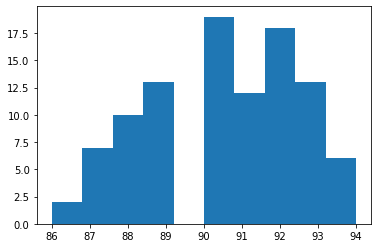

Generation 23
    Max fitness 94.0
    Min fitness 86.0
    Mean fitness 90.49
    Std fitness 2.05180408421467


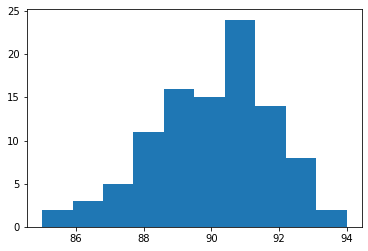

Generation 24
    Max fitness 94.0
    Min fitness 85.0
    Mean fitness 90.09
    Std fitness 1.965171748219478


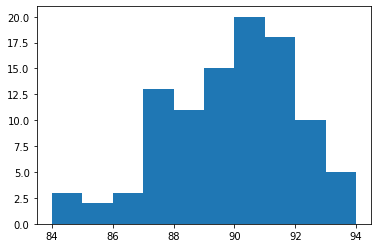

Generation 25
    Max fitness 94.0
    Min fitness 84.0
    Mean fitness 89.38
    Std fitness 2.129694813817229


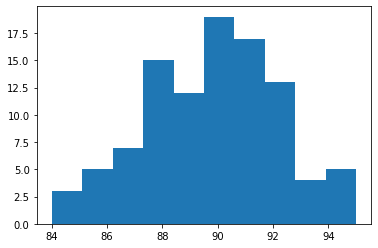

Generation 26
    Max fitness 95.0
    Min fitness 84.0
    Mean fitness 89.77
    Std fitness 2.212939221939907


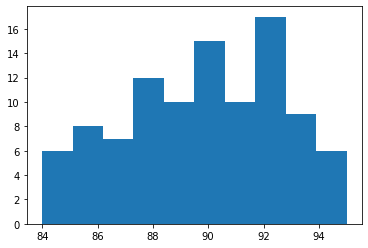

Generation 27
    Max fitness 95.0
    Min fitness 84.0
    Mean fitness 89.77
    Std fitness 2.6071248531667983


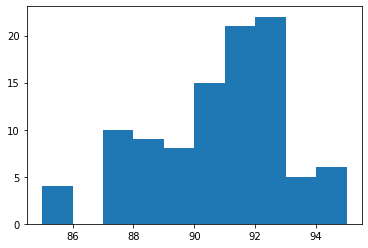

Generation 28
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 90.31
    Std fitness 2.239173954832451


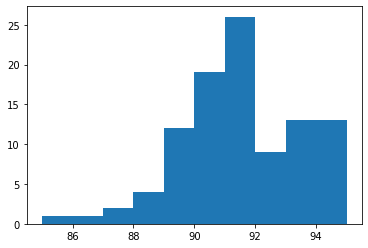

Generation 29
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 91.04
    Std fitness 2.0045947221321323


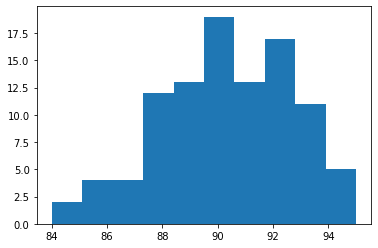

Generation 30
    Max fitness 95.0
    Min fitness 84.0
    Mean fitness 90.25
    Std fitness 2.2017038856304


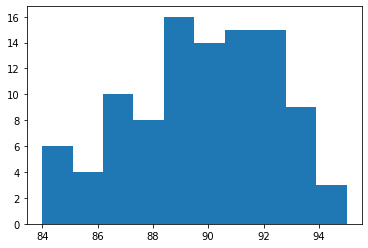

Generation 31
    Max fitness 95.0
    Min fitness 84.0
    Mean fitness 89.77
    Std fitness 2.4077167607507324


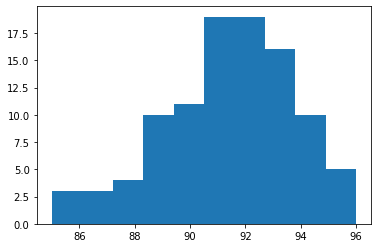

Generation 32
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 91.31
    Std fitness 2.1757527433051758


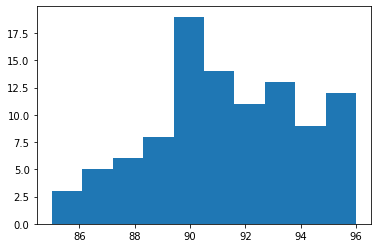

Generation 33
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 91.27
    Std fitness 2.521329014627008


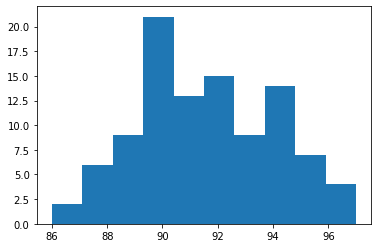

Generation 34
    Max fitness 97.0
    Min fitness 86.0
    Mean fitness 91.58
    Std fitness 2.2767520725805874


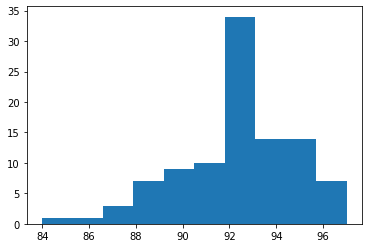

Generation 35
    Max fitness 97.0
    Min fitness 84.0
    Mean fitness 92.39
    Std fitness 2.477478556920322


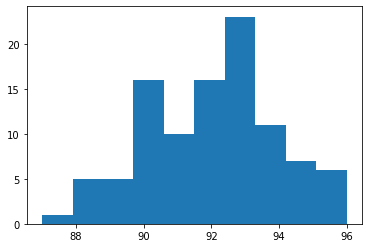

Generation 36
    Max fitness 96.0
    Min fitness 87.0
    Mean fitness 92.08
    Std fitness 2.119811312357777


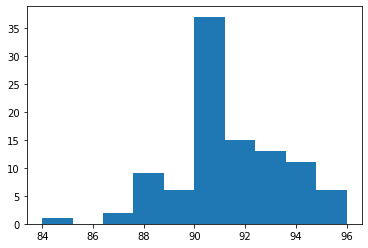

Generation 37
    Max fitness 96.0
    Min fitness 84.0
    Mean fitness 91.27
    Std fitness 2.1856577957219194


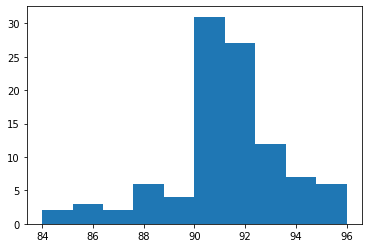

Generation 38
    Max fitness 96.0
    Min fitness 84.0
    Mean fitness 91.21
    Std fitness 2.290392979381486


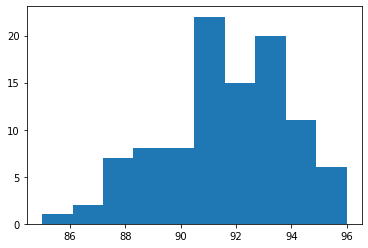

Generation 39
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 91.55
    Std fitness 2.1183720164314854


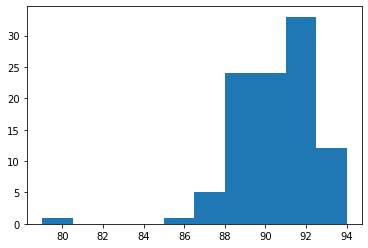

Generation 40
    Max fitness 94.0
    Min fitness 79.0
    Mean fitness 90.21
    Std fitness 2.103782308129812


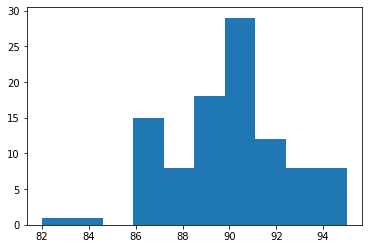

Generation 41
    Max fitness 95.0
    Min fitness 82.0
    Mean fitness 89.96
    Std fitness 2.4450766859139614


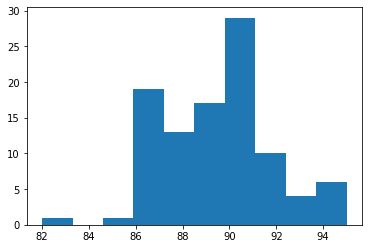

Generation 42
    Max fitness 95.0
    Min fitness 82.0
    Mean fitness 89.56
    Std fitness 2.363556642012202


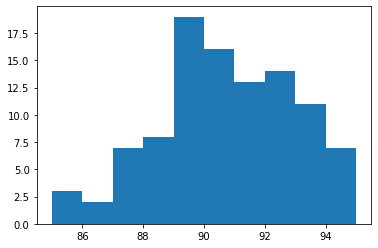

Generation 43
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 90.25
    Std fitness 2.2643983748448506


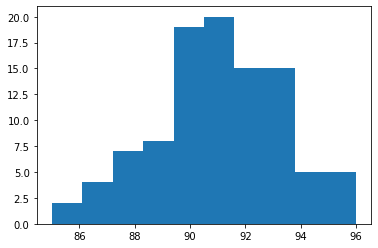

Generation 44
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 90.98
    Std fitness 2.116506555624149


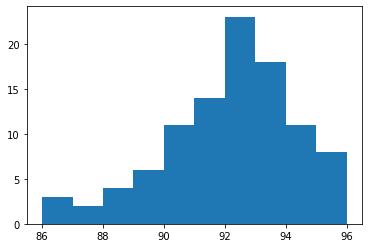

Generation 45
    Max fitness 96.0
    Min fitness 86.0
    Mean fitness 91.68
    Std fitness 2.1720036832381293


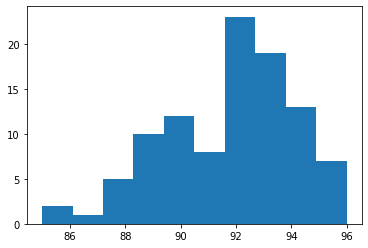

Generation 46
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 91.69
    Std fitness 2.1940601632589747


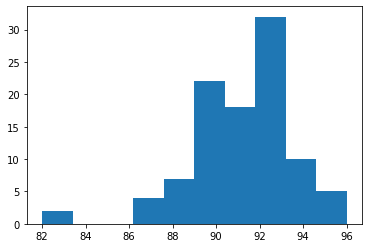

Generation 47
    Max fitness 96.0
    Min fitness 82.0
    Mean fitness 91.16
    Std fitness 2.4278385448789632


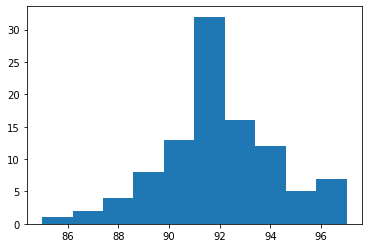

Generation 48
    Max fitness 97.0
    Min fitness 85.0
    Mean fitness 91.88
    Std fitness 2.3421357774475844


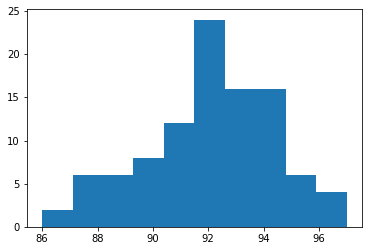

Generation 49
    Max fitness 97.0
    Min fitness 86.0
    Mean fitness 92.02
    Std fitness 2.1493254755853055


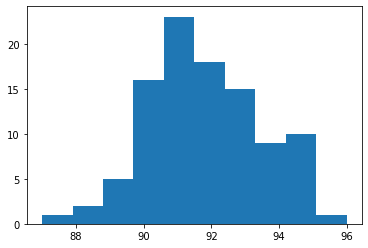

Generation 50
    Max fitness 96.0
    Min fitness 87.0
    Mean fitness 91.84
    Std fitness 1.8532134253776598


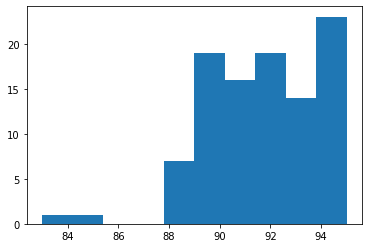

Generation 51
    Max fitness 95.0
    Min fitness 83.0
    Mean fitness 91.64
    Std fitness 2.1841245385737507


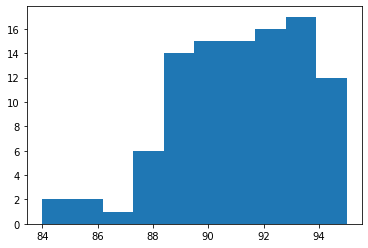

Generation 52
    Max fitness 95.0
    Min fitness 84.0
    Mean fitness 91.02
    Std fitness 2.2714752915231102


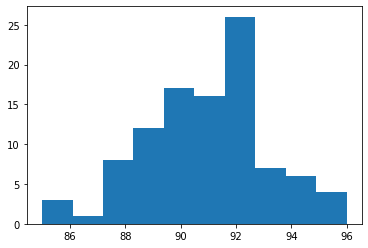

Generation 53
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 90.9
    Std fitness 2.0469489490458717


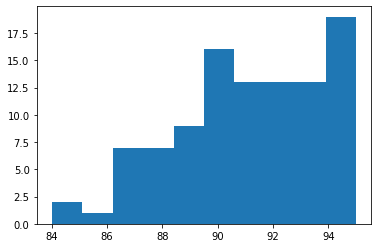

Generation 54
    Max fitness 95.0
    Min fitness 84.0
    Mean fitness 91.04
    Std fitness 2.521586801995918


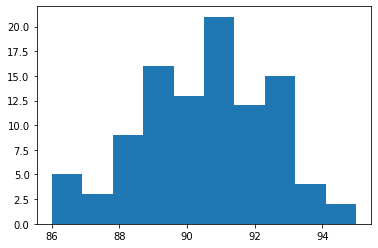

Generation 55
    Max fitness 95.0
    Min fitness 86.0
    Mean fitness 90.53
    Std fitness 2.1187496312684044


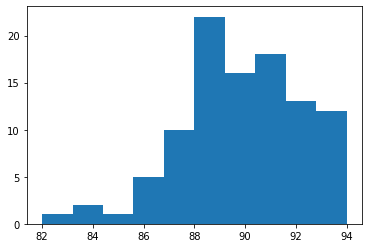

Generation 56
    Max fitness 94.0
    Min fitness 82.0
    Mean fitness 89.81
    Std fitness 2.4153467659944816


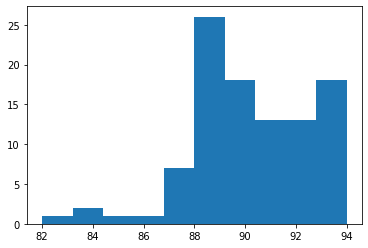

Generation 57
    Max fitness 94.0
    Min fitness 82.0
    Mean fitness 90.09
    Std fitness 2.379474731952411


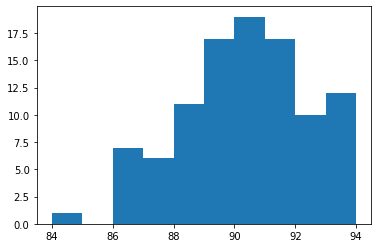

Generation 58
    Max fitness 94.0
    Min fitness 84.0
    Mean fitness 89.89
    Std fitness 2.181261103123603


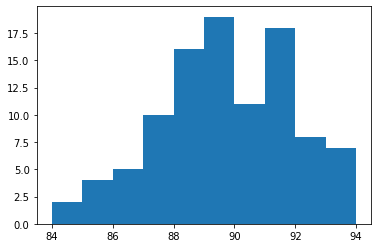

Generation 59
    Max fitness 94.0
    Min fitness 84.0
    Mean fitness 89.24
    Std fitness 2.2231509170544403


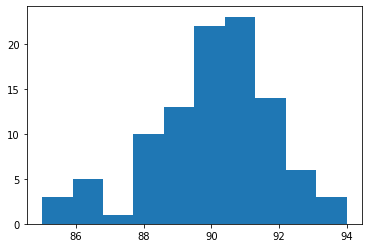

Generation 60
    Max fitness 94.0
    Min fitness 85.0
    Mean fitness 90.1
    Std fitness 1.9924858845171272


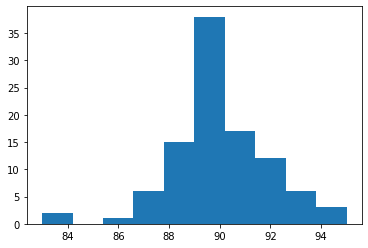

Generation 61
    Max fitness 95.0
    Min fitness 83.0
    Mean fitness 89.9
    Std fitness 2.017424100183201


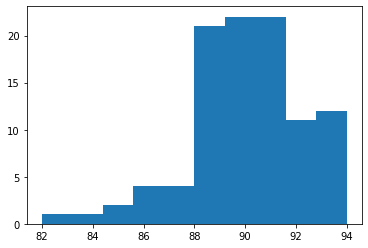

Generation 62
    Max fitness 94.0
    Min fitness 82.0
    Mean fitness 90.04
    Std fitness 2.2668039174132373


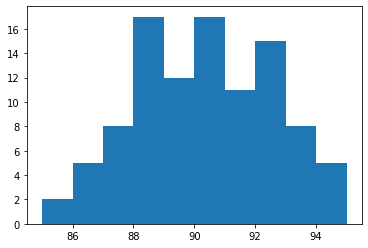

Generation 63
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 89.86
    Std fitness 2.262830086418333


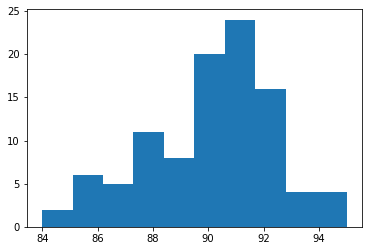

Generation 64
    Max fitness 95.0
    Min fitness 84.0
    Mean fitness 90.06
    Std fitness 2.1439216403590873


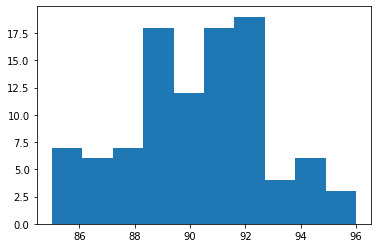

Generation 65
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 90.25
    Std fitness 2.372235232855292


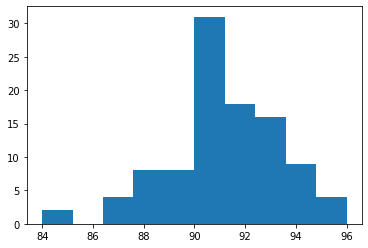

Generation 66
    Max fitness 96.0
    Min fitness 84.0
    Mean fitness 91.08
    Std fitness 2.248021352211762


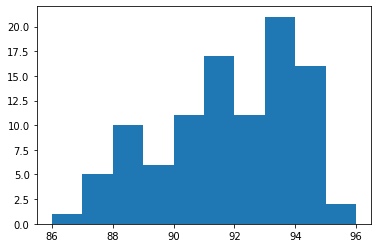

Generation 67
    Max fitness 96.0
    Min fitness 86.0
    Mean fitness 91.32
    Std fitness 2.2355312567709715


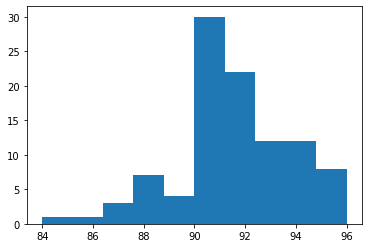

Generation 68
    Max fitness 96.0
    Min fitness 84.0
    Mean fitness 91.45
    Std fitness 2.26439837484485


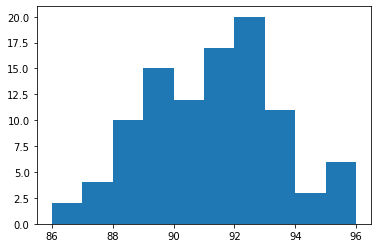

Generation 69
    Max fitness 96.0
    Min fitness 86.0
    Mean fitness 90.8
    Std fitness 2.2045407685048604


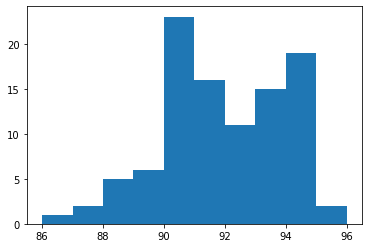

Generation 70
    Max fitness 96.0
    Min fitness 86.0
    Mean fitness 91.44
    Std fitness 2.0313542280951395


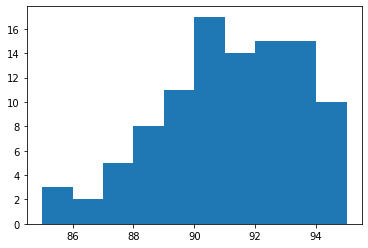

Generation 71
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 90.67
    Std fitness 2.3368996555265267


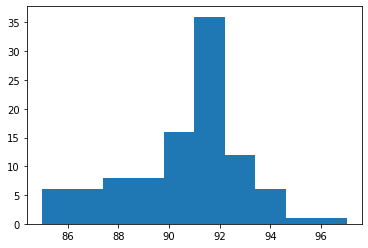

Generation 72
    Max fitness 97.0
    Min fitness 85.0
    Mean fitness 90.55
    Std fitness 2.3167865676406185


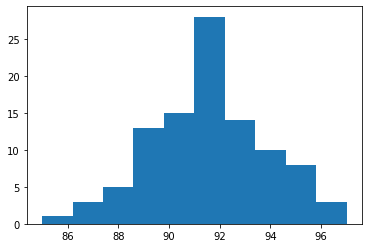

Generation 73
    Max fitness 97.0
    Min fitness 85.0
    Mean fitness 91.44
    Std fitness 2.3423065555131757


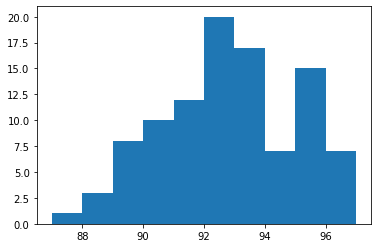

Generation 74
    Max fitness 97.0
    Min fitness 87.0
    Mean fitness 92.34
    Std fitness 2.2459741761649887


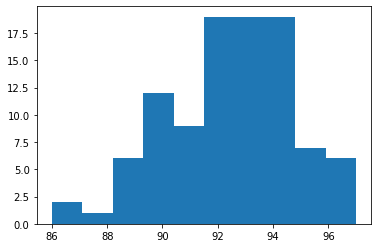

Generation 75
    Max fitness 97.0
    Min fitness 86.0
    Mean fitness 92.38
    Std fitness 2.1108292209461195


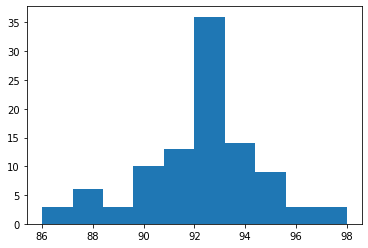

Generation 76
    Max fitness 98.0
    Min fitness 86.0
    Mean fitness 92.16
    Std fitness 2.361016730139793


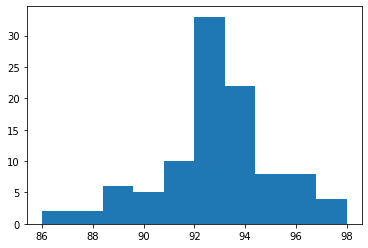

Generation 77
    Max fitness 98.0
    Min fitness 86.0
    Mean fitness 92.78
    Std fitness 2.300347799790284


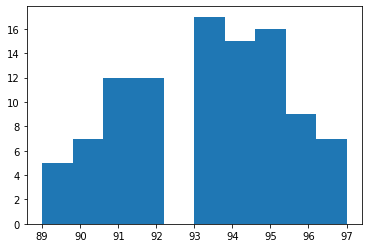

Generation 78
    Max fitness 97.0
    Min fitness 89.0
    Mean fitness 93.25
    Std fitness 2.165063509461097


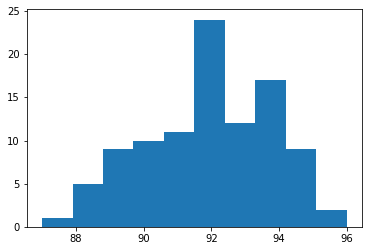

Generation 79
    Max fitness 96.0
    Min fitness 87.0
    Mean fitness 91.98
    Std fitness 2.0735476845252436


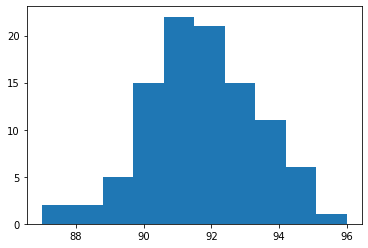

Generation 80
    Max fitness 96.0
    Min fitness 87.0
    Mean fitness 91.74
    Std fitness 1.8200000000000003


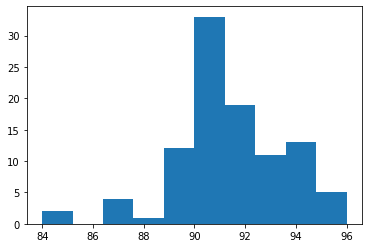

Generation 81
    Max fitness 96.0
    Min fitness 84.0
    Mean fitness 91.31
    Std fitness 2.18949765928169


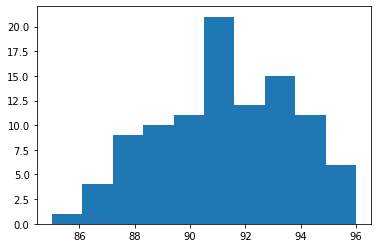

Generation 82
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 91.2
    Std fitness 2.244994432064365


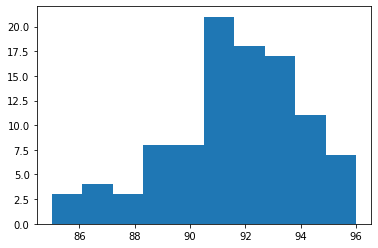

Generation 83
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 91.49
    Std fitness 2.2338084071826754


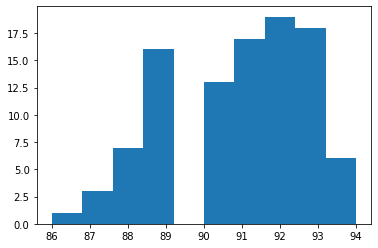

Generation 84
    Max fitness 94.0
    Min fitness 86.0
    Mean fitness 90.9
    Std fitness 1.8894443627691182


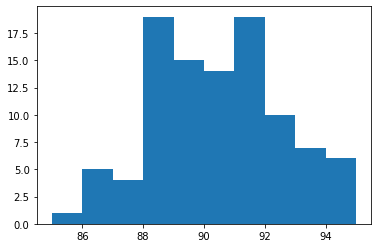

Generation 85
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 89.96
    Std fitness 2.1629609335353237


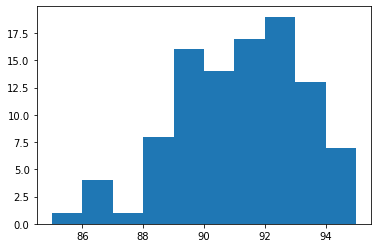

Generation 86
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 90.68
    Std fitness 2.0970455407548974


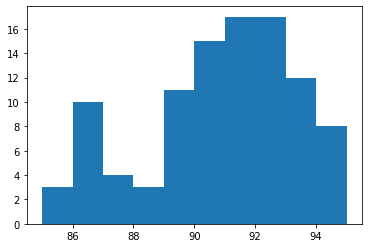

Generation 87
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 90.37
    Std fitness 2.488593980544034


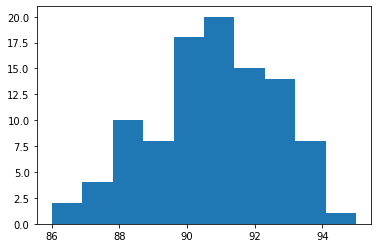

Generation 88
    Max fitness 95.0
    Min fitness 86.0
    Mean fitness 90.81
    Std fitness 2.0233388248140742


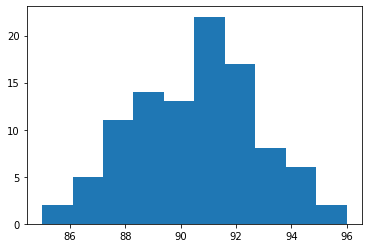

Generation 89
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 90.55
    Std fitness 2.080264406271472


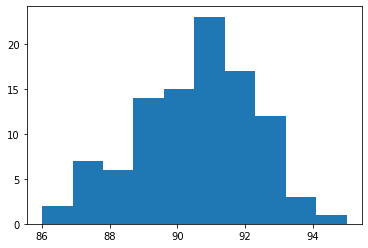

Generation 90
    Max fitness 95.0
    Min fitness 86.0
    Mean fitness 90.55
    Std fitness 1.9358460682605938


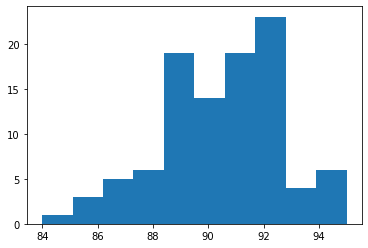

Generation 91
    Max fitness 95.0
    Min fitness 84.0
    Mean fitness 90.4
    Std fitness 2.0639767440550294


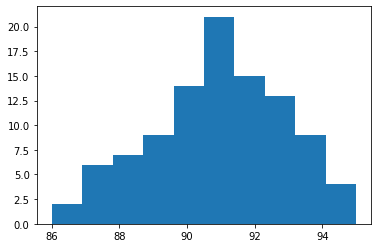

Generation 92
    Max fitness 95.0
    Min fitness 86.0
    Mean fitness 90.97
    Std fitness 2.1700460824600016


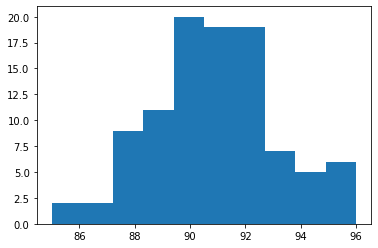

Generation 93
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 90.86
    Std fitness 2.1024747323095228


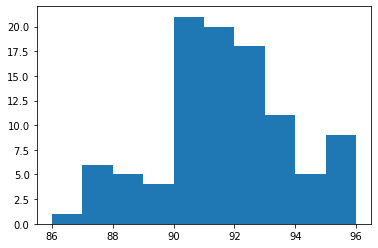

Generation 94
    Max fitness 96.0
    Min fitness 86.0
    Mean fitness 91.21
    Std fitness 2.183094134479776


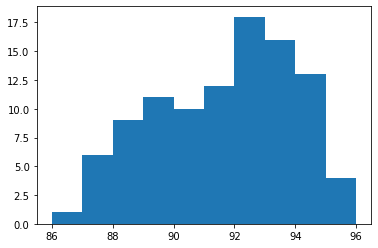

Generation 95
    Max fitness 96.0
    Min fitness 86.0
    Mean fitness 91.2
    Std fitness 2.328089345364563


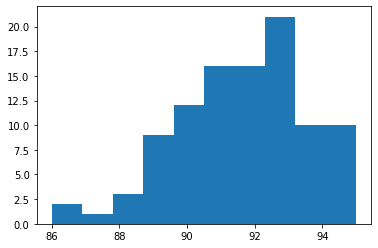

Generation 96
    Max fitness 95.0
    Min fitness 86.0
    Mean fitness 91.75
    Std fitness 2.0850659461993044


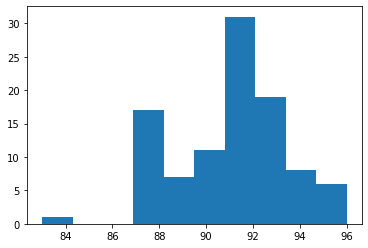

Generation 97
    Max fitness 96.0
    Min fitness 83.0
    Mean fitness 91.15
    Std fitness 2.397394418947371


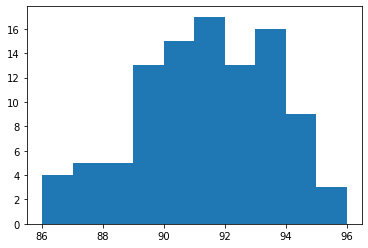

Generation 98
    Max fitness 96.0
    Min fitness 86.0
    Mean fitness 90.89
    Std fitness 2.248977545463716


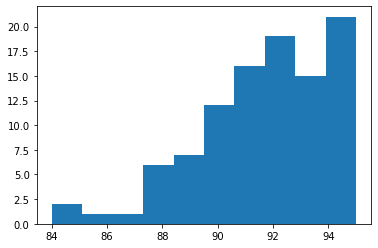

Generation 99
    Max fitness 95.0
    Min fitness 84.0
    Mean fitness 91.48
    Std fitness 2.188515478583599


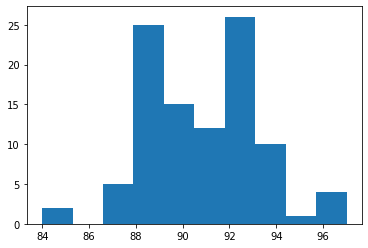

Generation 100
    Max fitness 97.0
    Min fitness 84.0
    Mean fitness 90.88
    Std fitness 2.4506325713986583


In [15]:
#initial population
pop = np.random.randint(0,2, size=(population,genes))

for i in range(generations):
  pop = simple_GA(pop)
  fitness = np.sum(pop,axis=1)
  plt.hist(fitness)
  plt.show()
  print(f"Generation {i+1}")
  print(f"    Max fitness {np.max(fitness)}")
  print(f"    Min fitness {np.min(fitness)}")
  print(f"    Mean fitness {np.mean(fitness)}")
  print(f"    Std fitness {np.std(fitness)}")